In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [61]:
#reading the dataset downloaded from kaggle
iris= pd.read_csv('Iris.csv')
iris.drop('Id',axis=1,inplace=True)
iris = shuffle(iris).reset_index(drop=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.4,3.2,5.3,2.3,Iris-virginica
1,6.1,2.8,4.7,1.2,Iris-versicolor
2,5.0,3.0,1.6,0.2,Iris-setosa
3,5.2,2.7,3.9,1.4,Iris-versicolor
4,5.5,3.5,1.3,0.2,Iris-setosa


In [62]:
#divide the datset into features and targets
dataX = iris.iloc[:,:4]
dataY = iris['Species']

In [63]:
dataX.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,6.4,3.2,5.3,2.3
1,6.1,2.8,4.7,1.2
2,5.0,3.0,1.6,0.2
3,5.2,2.7,3.9,1.4
4,5.5,3.5,1.3,0.2


In [64]:
#Normalize the dataset onto the same scale (not necessary in this dataset)
scaler = StandardScaler().fit_transform(dataX)

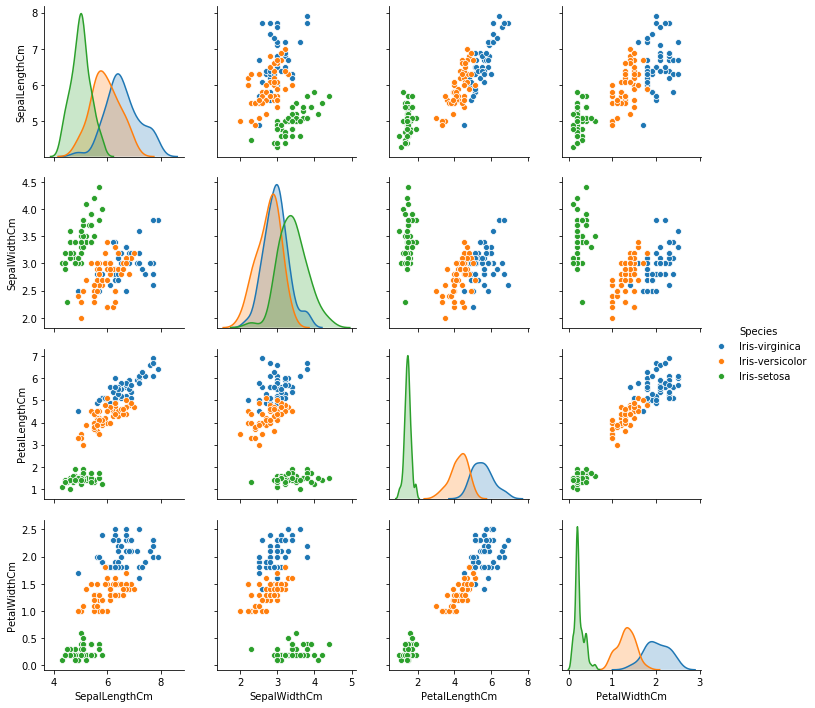

In [65]:
# pairplot to understand the relation between different features
pair = sns.pairplot(iris,hue='Species')

In [66]:
# divide the dataset into training and test data
X_train,X_test,y_train,y_test = train_test_split(dataX,dataY,test_size=0.25,random_state=0)

## K-nearest Neighbor Classification

In [69]:
# using Cross-Validation to find the optimum value of K with minimum error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
score = list()
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')
    accuracy = cross_val_score(knn,dataX,dataY,scoring='accuracy',cv=5)
    score.append(accuracy.mean(axis=0))

the value of k with minimum error is 7 with accuracy of 96.66666666666669


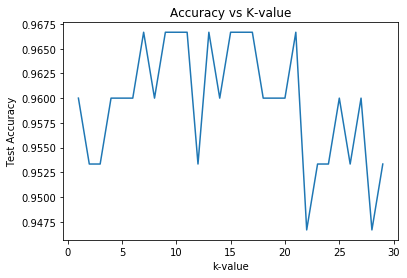

In [70]:
# Plotting the accuracy of the model with different values of K

error = [1 - x for x in score]
plt.plot(range(1,30),score)
plt.title('Accuracy vs K-value')
plt.xlabel('k-value')
plt.ylabel('Test Accuracy')
error_min = error.index(min(error))
accuracy = score[error_min]*100
print('the value of k with minimum error is {0} with accuracy of {1}'.format(error_min+1,accuracy))


In [71]:
# Train the model with Training Data
knn_optimal = KNeighborsClassifier(n_neighbors=7)
knn_optimal.fit(dataX,dataY)
accuracy_knn = knn_optimal.score(X_test,y_test)

In [72]:
# generate prediction on a test set data 
pred_x = [[4.9,3.0,1.4,0.2]]
pred_y_knn = knn_optimal.predict(pred_x)
pred_y_knn = str(pred_y_knn)
print('the predicted species is {0}'.format(pred_y_knn))

the predicted species is ['Iris-setosa']


## Decision-Tree Classification

In [79]:
# cross-validation score to find the optimized value of depth

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(max_depth=3)
accuracy = cross_val_score(dtc,dataX,dataY,cv=5)
print(accuracy.mean(axis=0))


0.9466666666666667


In [80]:
dtc_optimized = DecisionTreeClassifier(max_depth=3)
dtc_optimized.fit(X_train,y_train)
accuracy_dtc = dtc_optimized.score(X_test,y_test)

[Text(348.75, 792.75, 'petal length (cm) <= 2.6\nentropy = 0.665\nsamples = 112\nvalue = [41, 34, 37]\nclass = setosa'),
 Text(232.5, 566.25, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(465.0, 566.25, 'petal width (cm) <= 1.75\nentropy = 0.499\nsamples = 71\nvalue = [0, 34, 37]\nclass = virginica'),
 Text(232.5, 339.75, 'petal length (cm) <= 4.9\nentropy = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(116.25, 113.25, 'entropy = 0.061\nsamples = 32\nvalue = [0, 31, 1]\nclass = versicolor'),
 Text(348.75, 113.25, 'entropy = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = versicolor'),
 Text(697.5, 339.75, 'petal length (cm) <= 4.85\nentropy = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = virginica'),
 Text(581.25, 113.25, 'entropy = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(813.75, 113.25, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 32]\nclass = virginica')]

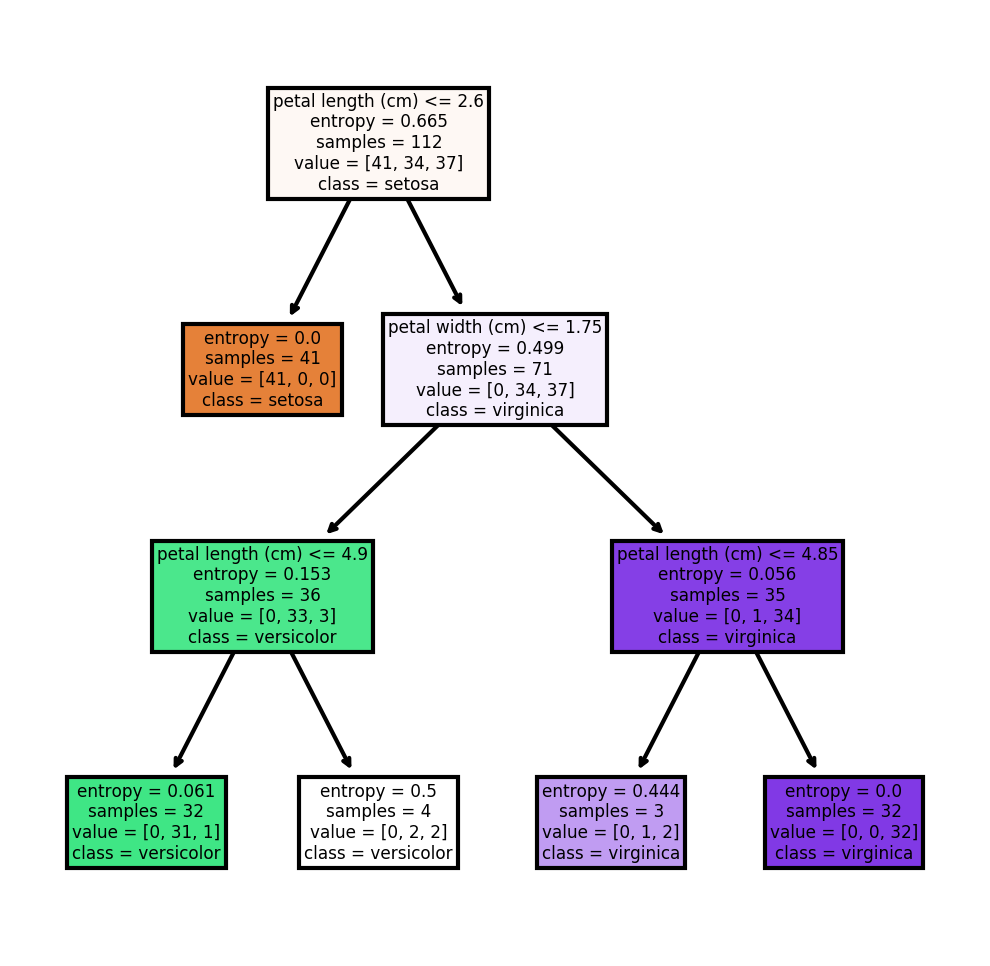

In [81]:
# Visualizing the Decission Tree

fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

cn = ['setosa', 'versicolor', 'virginica']
      
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)    
      
tree.plot_tree(dtc_optimized,
              feature_names=fn,
              class_names=cn,
               filled=True)

In [82]:
# predicting the value using test set data (pred_x defined in knn)
pred_y_dct = str(dtc_optimized.predict(pred_x))
print('the predicted flower from decision-tree is {0}'.format(pred_y_dct))


the predicted flower from decision-tree is ['Iris-setosa']


## SVM Classifier

In [99]:
# using Cross-Validation Score to find the optimum value of C
from sklearn.svm import SVC
svc_accuracy = list()
for c in range(1,100):
    svc = SVC(C=c,kernel='rbf')
    accuracy = cross_val_score(svc,dataX,dataY,cv=5)
    svc_accuracy.append(accuracy.mean(axis=0))

the accuracy is highest (0.9733333333333334) at value of C = 1


0.9733333333333334

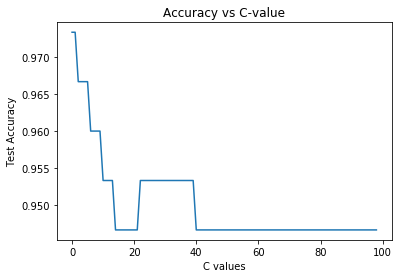

In [100]:

max_acc = max(svc_accuracy)
max_c = svc_accuracy.index(max_acc)+1
print('the accuracy is highest ({0}) at value of C = {1}'.format(max_acc,max_c))
plt.plot(svc_accuracy)
plt.title('Accuracy vs C-value')
plt.xlabel('C values')
plt.ylabel('Test Accuracy')
svc_accuracy[1]

In [125]:
# the model overfits at value between 1-10
svc_optimized = SVC(kernel='rbf',C=25).fit(X_train,y_train)
accuracy_svc = svc_optimized.score(X_test,y_test)

In [126]:
pred_y_svc = str(svc_optimized.predict(pred_x))
print('the flower predicted from SVM classifier is {0}'.format(pred_y_svc))

the flower predicted from SVM classifier is ['Iris-setosa']


In [127]:
print('the accuracy of the model using K-nearest Neighbor is {0}'.format(accuracy_knn))
print('the accuracy of the model using Decision tree is {0}'.format(accuracy_dtc))
print('the accuracy of the model using SVM Classifier is {0}'.format(accuracy_svc))

the accuracy of the model using K-nearest Neighbor is 0.9736842105263158
the accuracy of the model using Decision tree is 0.9473684210526315
the accuracy of the model using SVM Classifier is 0.9736842105263158
